In [ ]:
!pip install kaggle
from google.colab import files
uploaded = files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 305MB/s]


In [ ]:
!unzip telco-customer-churn.zip


Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [ ]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop(['customerID'], axis =1, inplace=True)

In [ ]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
"Univariate data visualization"

In [ ]:
obj_col = [col for col in df.columns if df[col].dtype == 'object']

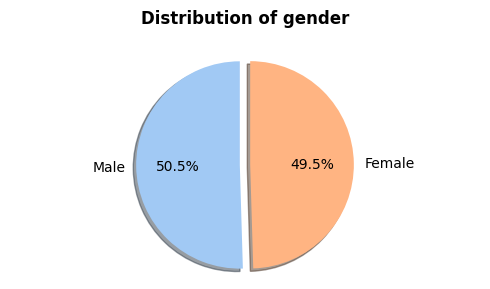

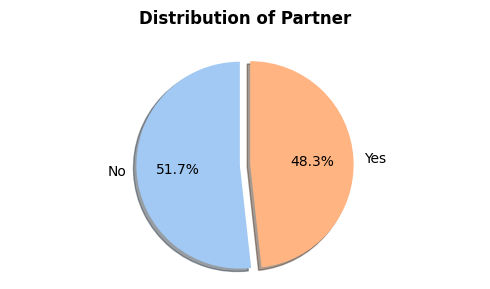

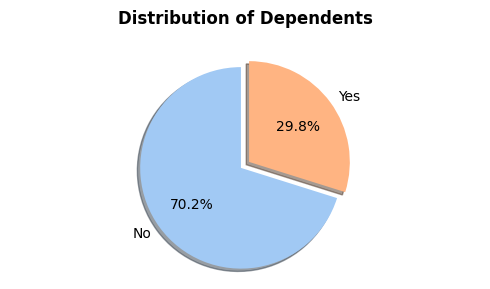

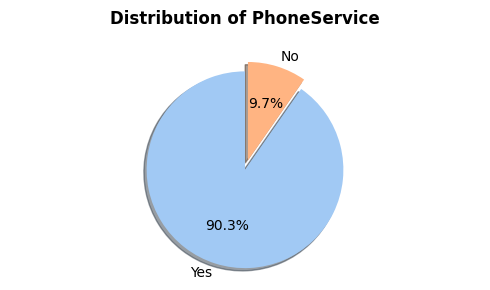

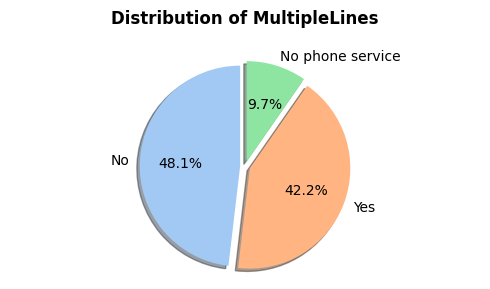

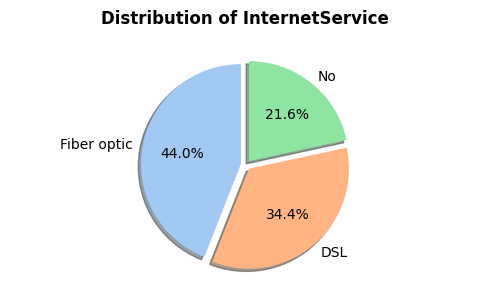

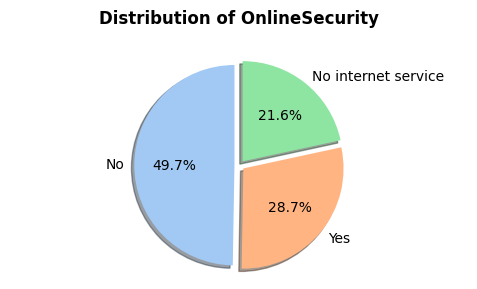

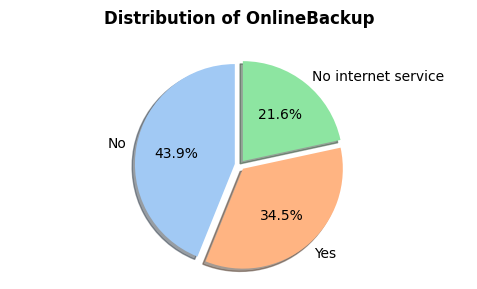

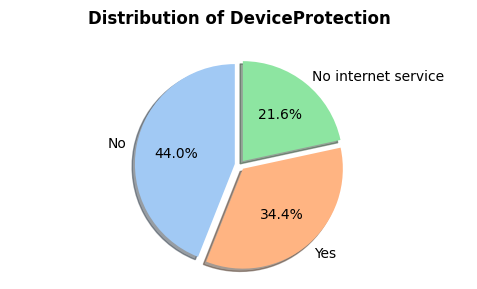

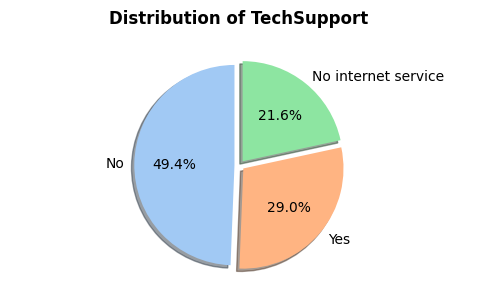

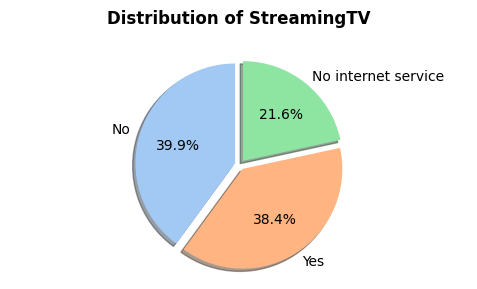

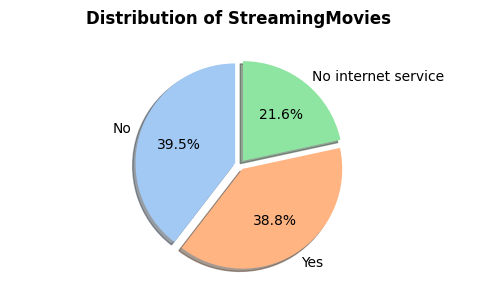

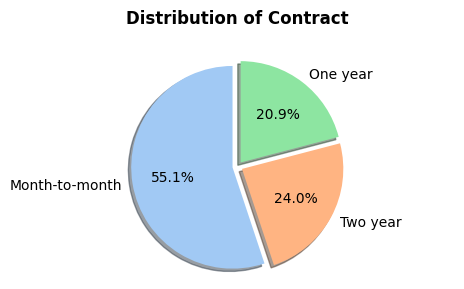

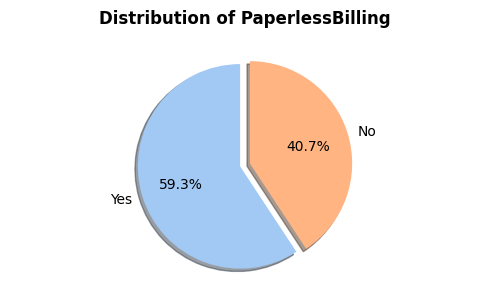

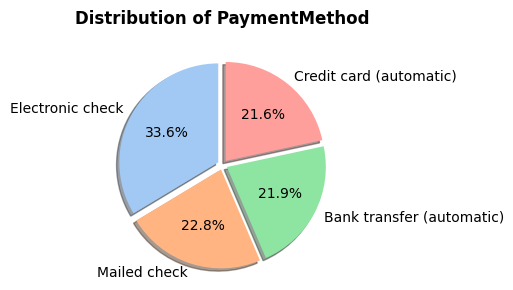

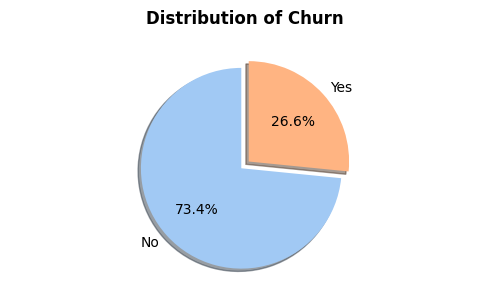

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in obj_col:
    plt.figure(figsize=(5,3))
    plt.pie(df[col].value_counts(), labels = df[col].value_counts().index, autopct="%1.1f%%", startangle=90
           ,shadow=True,colors=sns.color_palette("pastel"), explode=[0.05] * len(df[col].value_counts())
           )
    plt.title(f'Distribution of {col}', fontweight='bold', pad=20)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

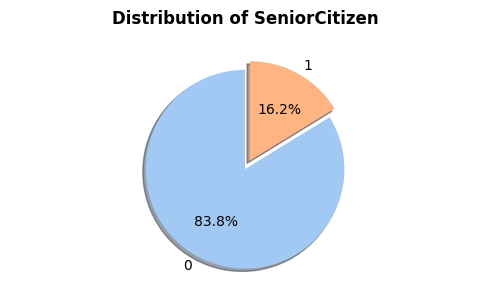

In [ ]:
plt.figure(figsize=(5,3))
plt.pie(df['SeniorCitizen'].value_counts(), labels = df['SeniorCitizen'].value_counts().index, autopct="%1.1f%%", startangle=90
       ,shadow=True,colors=sns.color_palette("pastel"), explode=[0.05] * len(df['SeniorCitizen'].value_counts())
       )
plt.title(f'Distribution of SeniorCitizen', fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
numerical_col = [col for col in df.columns if col not in obj_col]
numerical_col.remove('SeniorCitizen')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


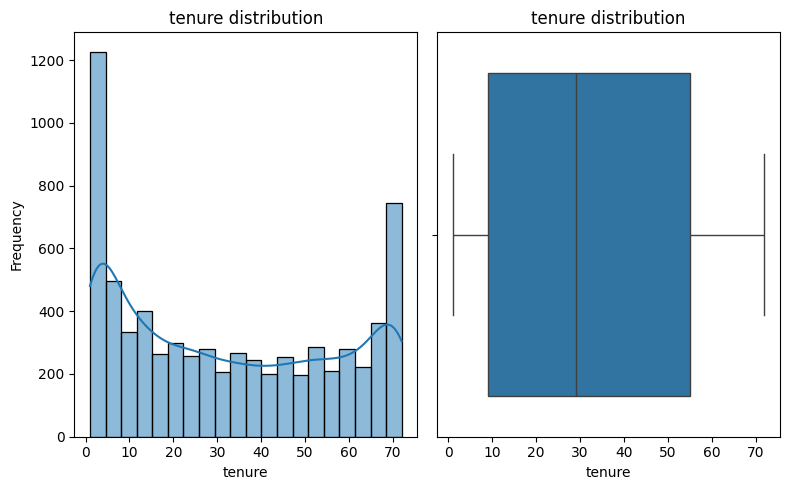

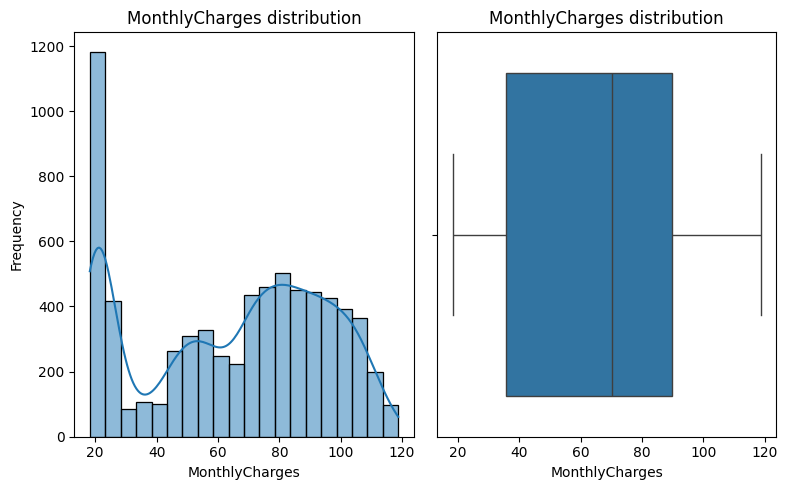

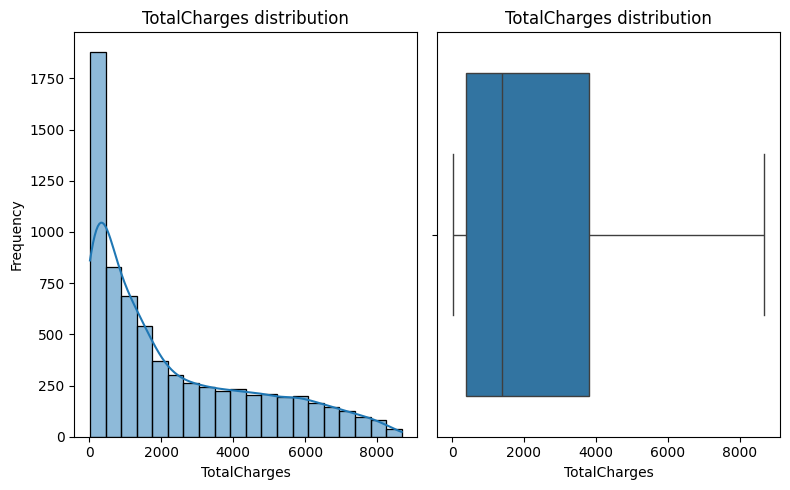

In [ ]:
for col in numerical_col:
    plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} distribution')
    plt.tight_layout()
    plt.show()

In [ ]:
"Bivariate Analysis"

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
for col in obj_col:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
# analyse descriptive des donnees
print(df.describe())

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.504693       0.162400     0.482509     0.298493    32.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7032.000000    7032.000000      7032.000000     7032.000000   
mean       0.903299       0.940557         0.872582        0.789249   
std        0.295571       0.948627         0.737271        0.859962   
min        0.000000       0.000

array([[<Axes: xlabel='gender', ylabel='gender'>,
        <Axes: xlabel='SeniorCitizen', ylabel='gender'>,
        <Axes: xlabel='Partner', ylabel='gender'>,
        <Axes: xlabel='Dependents', ylabel='gender'>,
        <Axes: xlabel='tenure', ylabel='gender'>,
        <Axes: xlabel='PhoneService', ylabel='gender'>,
        <Axes: xlabel='MultipleLines', ylabel='gender'>,
        <Axes: xlabel='InternetService', ylabel='gender'>,
        <Axes: xlabel='OnlineSecurity', ylabel='gender'>,
        <Axes: xlabel='OnlineBackup', ylabel='gender'>,
        <Axes: xlabel='DeviceProtection', ylabel='gender'>,
        <Axes: xlabel='TechSupport', ylabel='gender'>,
        <Axes: xlabel='StreamingTV', ylabel='gender'>,
        <Axes: xlabel='StreamingMovies', ylabel='gender'>,
        <Axes: xlabel='Contract', ylabel='gender'>,
        <Axes: xlabel='PaperlessBilling', ylabel='gender'>,
        <Axes: xlabel='PaymentMethod', ylabel='gender'>,
        <Axes: xlabel='MonthlyCharges', ylabel='gender

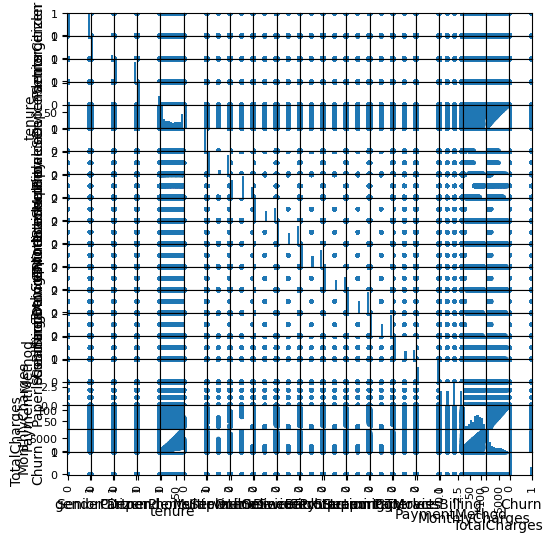

In [ ]:
# analyse graphique bidimentionnelle
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(6,6))

In [ ]:
# matrice et graphique de correlation
corr=df.corr()
print(corr)

                    gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001819 -0.001379    0.010349  0.005285   
SeniorCitizen    -0.001819       1.000000  0.016957   -0.210550  0.015683   
Partner          -0.001379       0.016957  1.000000    0.452269  0.381912   
Dependents        0.010349      -0.210550  0.452269    1.000000  0.163386   
tenure            0.005285       0.015683  0.381912    0.163386  1.000000   
PhoneService     -0.007515       0.008392  0.018397   -0.001078  0.007877   
MultipleLines    -0.006908       0.146287  0.142717   -0.024975  0.343673   
InternetService  -0.002236      -0.032160  0.000513    0.044030 -0.029835   
OnlineSecurity   -0.014899      -0.127937  0.150610    0.151198  0.327283   
OnlineBackup     -0.011920      -0.013355  0.153045    0.090231  0.372434   
DeviceProtection  0.001348      -0.021124  0.165614    0.079723  0.372669   
TechSupport      -0.006695      -0.151007  0.126488    0.132530  0.324729   

<Axes: >

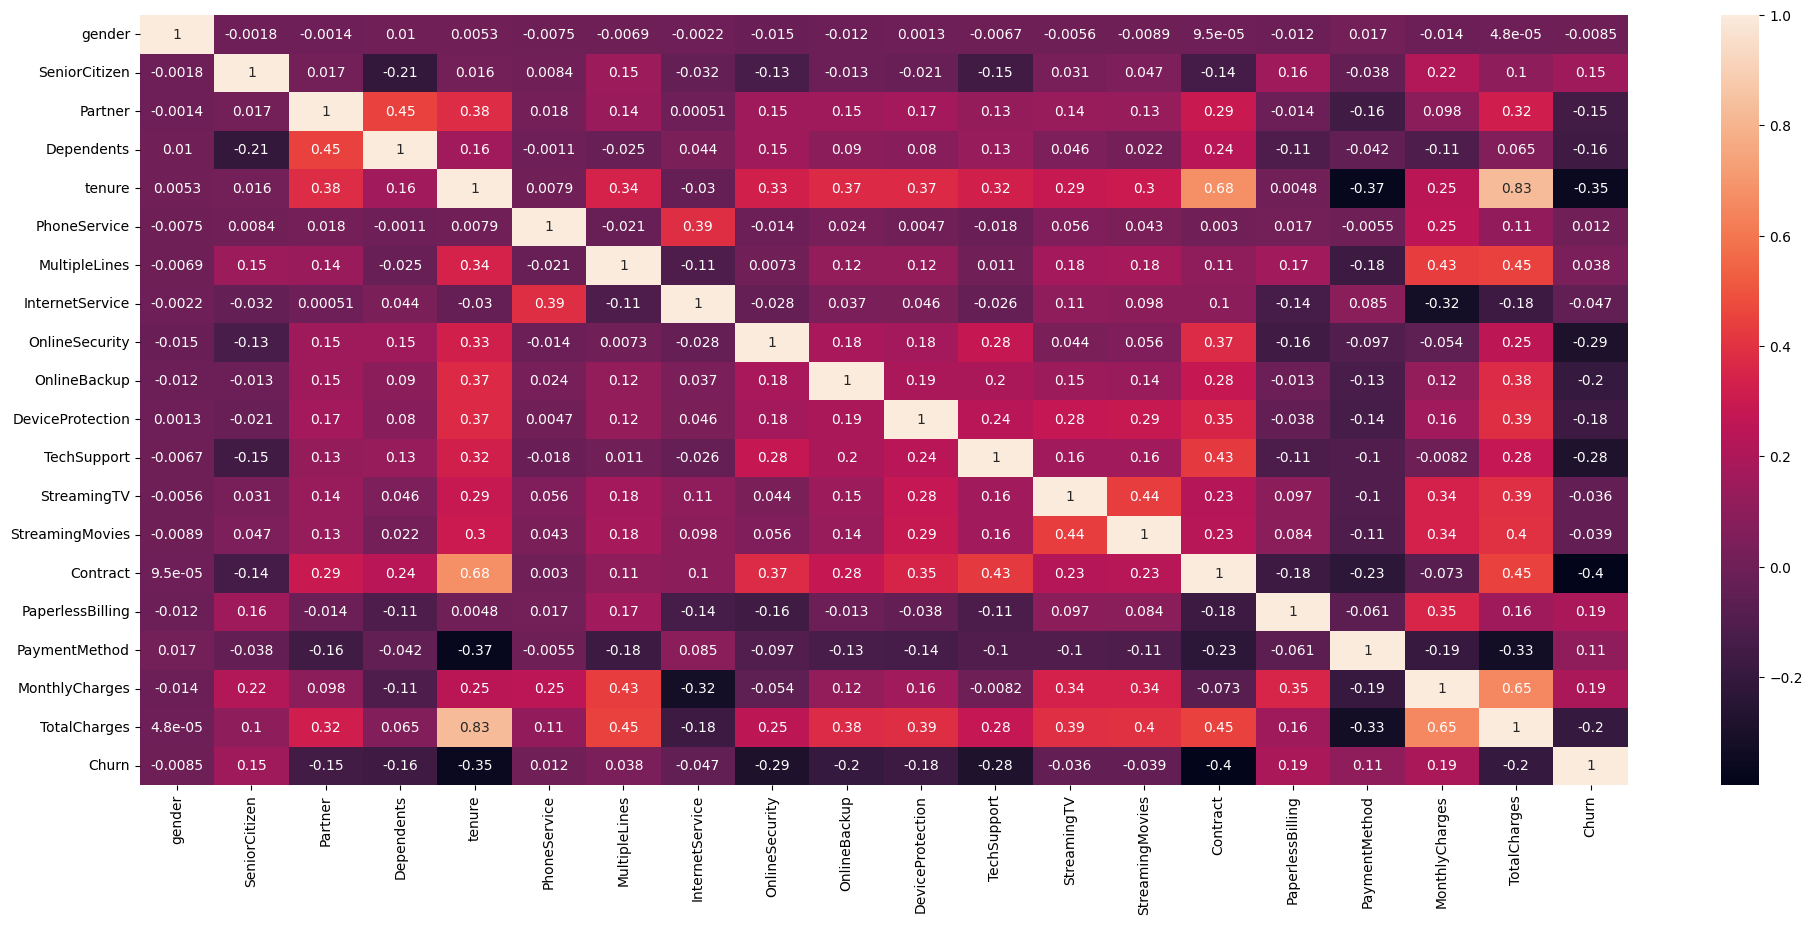

In [ ]:
plt.figure(figsize=(24,10))
data_corr = df.corr()
sns.heatmap(data_corr, annot=True)

In [ ]:
"Data Preprocessing"

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [ ]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])
X_test[numerical_col] = scaler.fit_transform(X_test[numerical_col])

In [ ]:
"Modelling"

'Modelling'

In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
predict = model.predict(X=X_test)

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.47      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predict = forest.predict(X_test)

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



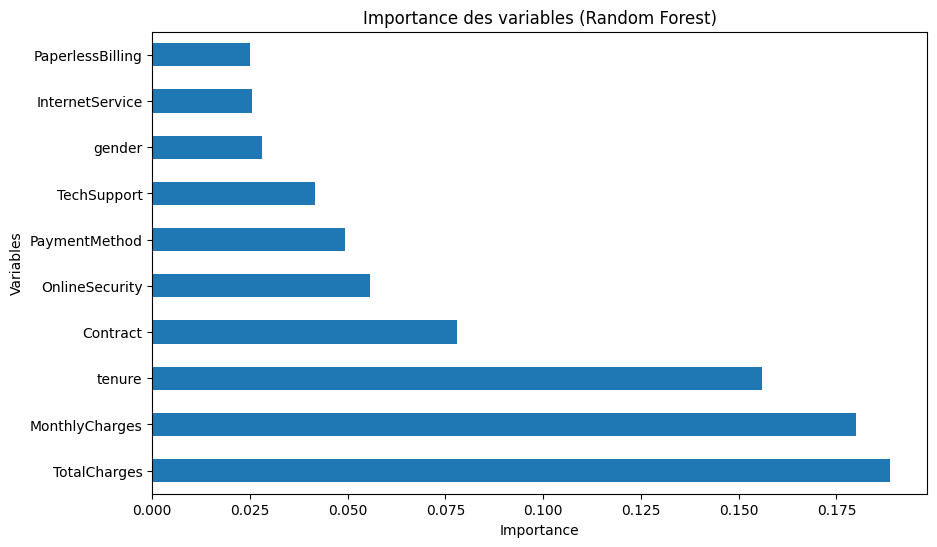

In [ ]:
"Display the most important features"
import pandas as pd
import matplotlib.pyplot as plt

importances = forest.feature_importances_
features = X_train.columns

feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title("Importance des variables (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.show()

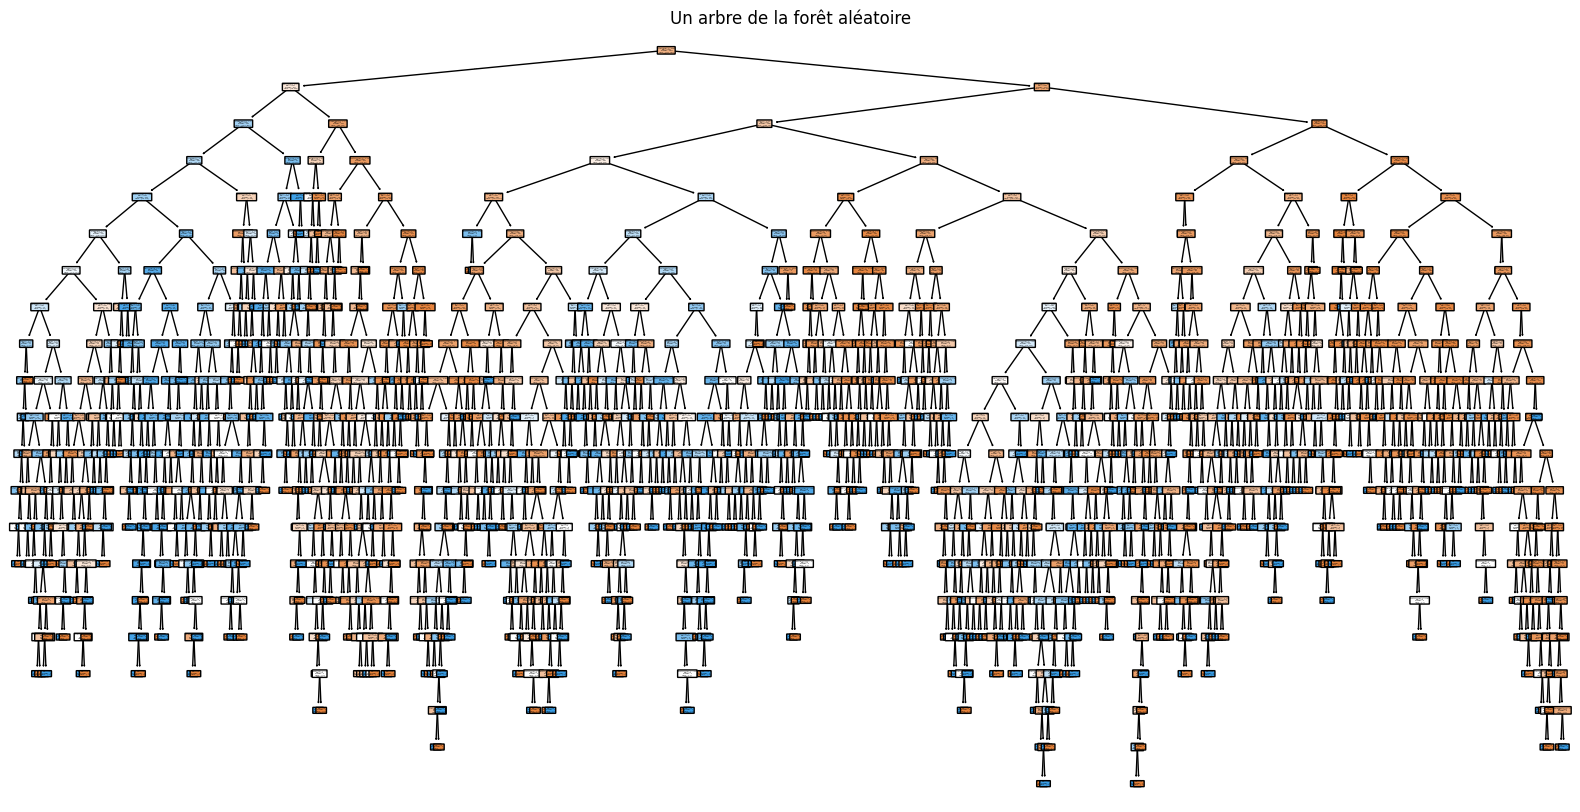

In [ ]:
"Display a single tree from the forest"
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(forest.estimators_[0],
          feature_names=X_train.columns,
          class_names=forest.classes_.astype(str),
          filled=True, rounded=True)
plt.title("Un arbre de la forêt aléatoire")
plt.show()

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
predict = naive_bayes.predict(X_test)

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1033
           1       0.51      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.78      0.74      0.75      1407

